In [1]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm


% matplotlib inline
plt.style.use("ggplot")

folder = "C:\Users\shinichi.kikuchi\Desktop\NMF\data\\"



In [2]:
#####  財務数値のスケーリング（指標：1～5、欠損：0）  #####

def scaling_data ( ds ):
    
    ds2 = pd.to_numeric ( ds ) * 1.0
    ds3 = ds2[ ds2.isnull()== False ]
    
    ds4 = ( ( ds3 - ds3.min() ) + 1e-10 ).apply(np.log)

    x_min = ds3.min()
    logx_min = ds4.median() - ds4.std() * 3
    logx_max = ds4.median() + ds4.std() * 3
    

    ds_new = ds2
    for i, x in enumerate(ds2):  
        if x!=x:
            ds_new[i]=0
        else:
            logx = np.log ( ( x - x_min ) + 1e-10 )
    
            if ( logx < logx_min ):
                logx = logx_min
        
            if ( logx > logx_max):
                logx = logx_max
            
            log_score = ( logx - logx_min ) / ( logx_max - logx_min ) 
            
            ds_new[i] = log_score * 4 + 1
            
    return ds_new


def scaling_all_data ( df ):
    
    df2 = df
    
    for cc in df2.columns:        
        df2[cc] = scaling_data ( df[cc] )
        
    return df2



In [3]:
#####  メイン関数  #####


#####  データマートの作成  #####
df = pd.read_csv ( folder + "datamart2.csv", header=None).T        # 15社


df.columns = df.ix[0,]
df2 = df.drop(df.index[[0]]).reset_index(drop=True)

df21 = df2.drop([ "コード", "企業名" ], axis=1)
df22 = df2[ ["コード", "企業名"] ]

X = scaling_all_data ( df21 )
datamart = pd.concat ( [df22, X], axis=1 )

company_label = datamart[ ["コード", "企業名"] ]
zaimu_label = pd.DataFrame ( datamart.columns[2:] )



In [ ]:
import nimfa
import pandas as pd


nmf = nimfa.Nmf(X.as_matrix(), seed='random_vcol', max_iter=10000)
nmf_fit = nmf()

summary = nmf.estimate_rank ( rank_range=range(2,16), what='all', n_run=200 ) 


df_rank = pd.DataFrame ( columns=['rank', 'cophenetic'] )
for rank, vals in summary.items():
    df_rank = df_rank.append ( pd.Series ( [rank, vals['cophenetic']], index=['rank', 'cophenetic']), ignore_index=True )

    
df_rank.set_index("rank").plot()



In [144]:
def reorder ( C ):
    Y = 1 - C 
    Z = linkage ( squareform(Y), method='average' ) 
    ivl = leaves_list(Z) 
    ivl = ivl[::-1] 
    return C[:, ivl][ivl, :]



In [148]:
V = X.as_matrix()


for rank in range(2,3): 
    consensus = np.zeros ( (V.shape[1], V.shape[1]) ) 
    
    for i in range(20): 
        nmf = nimfa.Nmf ( V, rank=rank, seed="random_vcol", max_iter=100, update='euclidean', objective='conn', conn_change=40) 
        fit = nmf() 
        consensus += fit.fit.connectivity()
    
    consensus /= 20.0 
    p_consensus = reorder(consensus) 
    #plt.plot(p_consensus, rank) 



In [ ]:
A = p_consensus 
avec = np.array([A[i, j] for i in range(A.shape[0] - 1) for j in range(i + 1, A.shape[1])]) 
Y = 1 - avec 
Z = linkage(Y, method='average') 
return cophenet(Z, Y)[0] 


In [153]:
print p_consensus.shape

(97L, 97L)


In [108]:
from scipy.cluster.hierarchy import linkage, leaves_list 
from scipy.spatial.distance import squareform
from matplotlib.pyplot import savefig, imshow, set_cmap


def plot_consensus_rank ( X, rank ):
    lsnmf = nimfa.Lsnmf ( X.as_matrix(), seed='random_vcol', rank=rank, max_iter=100 )
    lsnmf_fit = lsnmf()
    
    C = lsnmf.consensus()
    Y = 1 - C 
    Z = linkage ( squareform(Y), method='average' ) 
    ivl = leaves_list(Z) 
    ivl = ivl[::-1] 
    C2 = C[:, ivl][ivl, :]
    
    set_cmap("RdBu_r") 
    imshow(C2) 

    

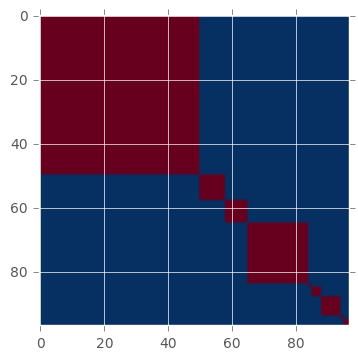

In [110]:
lsnmf = nimfa.Lsnmf(X.as_matrix(), seed='random_vcol', rank=10, max_iter=100)
lsnmf_fit = lsnmf()
plot_consensus(lsnmf.consensus())

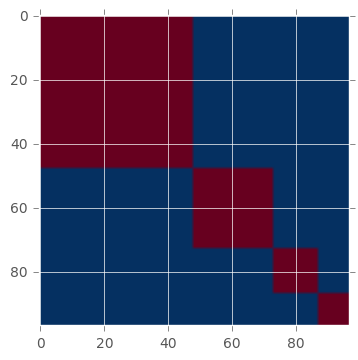

In [127]:
plot_consensus_rank ( X, rank=4 )

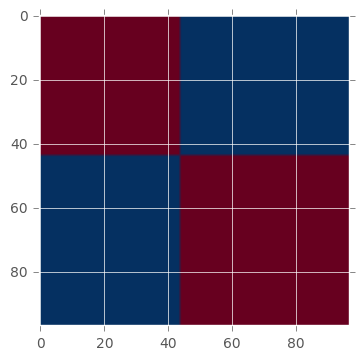

In [129]:
plot_consensus_rank ( X, rank=2 )

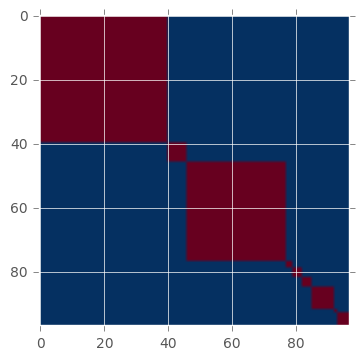

In [131]:
plot_consensus_rank ( X, rank=9 )